# QuTiP  example: Bloch-Redfield Master Equation

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
import numpy as np

In [3]:
from qutip import *

## Two-level system

In [4]:
delta = 0.0 * 2 * np.pi
epsilon = 0.5 * 2 * np.pi
gamma = 0.25
times = np.linspace(0, 10, 100)

In [5]:
H = delta/2 * sigmax() + epsilon/2 * sigmaz()
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[ 1.57079633  0.        ]
 [ 0.         -1.57079633]]

In [6]:
psi0 = (2 * basis(2, 0) + basis(2, 1)).unit()

In [7]:
c_ops = [np.sqrt(gamma) * sigmam()]
a_ops = [sigmax()]

In [8]:
e_ops = [sigmax(), sigmay(), sigmaz()]

In [9]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

In [10]:
result_brme = brmesolve(H, psi0, times, a_ops, e_ops, spectra_cb=[lambda w : gamma * (w > 0)])

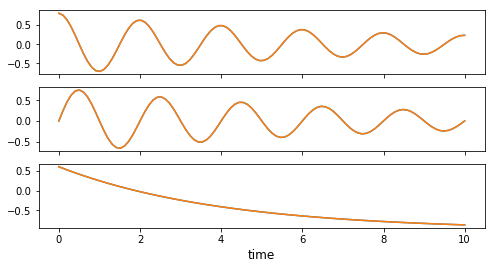

In [11]:
plot_expectation_values([result_me, result_brme]);

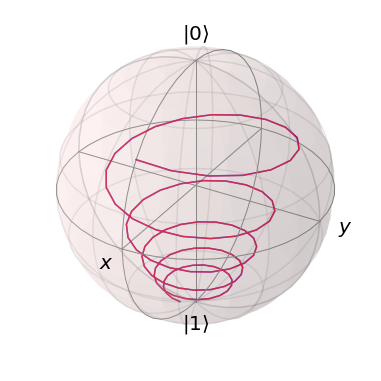

In [12]:
b = Bloch()
b.add_points(result_me.expect, meth='l')
b.add_points(result_brme.expect, meth='l')
b.make_sphere()

## Harmonic oscillator

In [13]:
N = 10

w0 = 1.0 * 2 * np.pi
g = 0.05 * w0
kappa = 0.15

times = np.linspace(0, 25, 1000)

In [14]:
a = destroy(N)

In [15]:
H = w0 * a.dag() * a + g * (a + a.dag())

In [16]:
# start in a superposition state
psi0 = ket2dm((basis(N, 4) + basis(N, 2) + basis(N,0)).unit())

In [19]:
c_ops = [np.sqrt(kappa) * a]
a_ops = [[a + a.dag(),lambda w : kappa * (w > 0)]]

In [20]:
e_ops = [a.dag() * a, a + a.dag()]

### Zero temperature

In [21]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

In [22]:
result_brme = brmesolve(H, psi0, times, a_ops, e_ops)

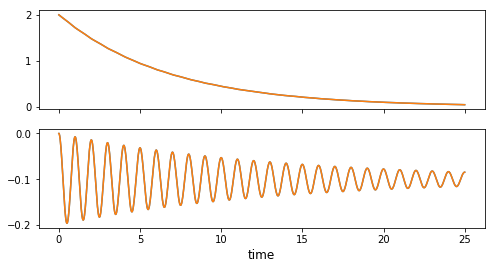

In [23]:
plot_expectation_values([result_me, result_brme]);

### Finite temperature

In [24]:
times = np.linspace(0, 25, 250)

In [27]:
n_th = 1.5
c_ops = [np.sqrt(kappa * (n_th + 1)) * a, np.sqrt(kappa * n_th) * a.dag()]

In [28]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

In [29]:
w_th = w0/np.log(1 + 1/n_th)

def S_w(w):
    if w >= 0:
        return (n_th + 1) * kappa
    else:
        return (n_th + 1) * kappa * np.exp(w / w_th)
    
a_ops = [[a + a.dag(),S_w]]

In [30]:
result_brme = brmesolve(H, psi0, times, a_ops, e_ops)

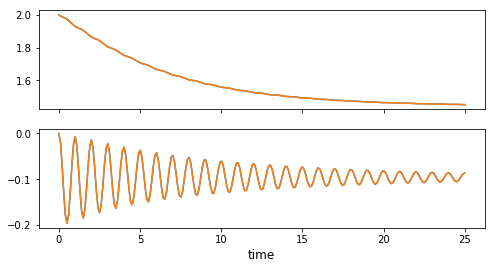

In [31]:
plot_expectation_values([result_me, result_brme]);

### Storing states instead of expectation values

In [32]:
result_me = mesolve(H, psi0, times, c_ops, [])

In [33]:
result_brme = brmesolve(H, psi0, times, a_ops, [])

In [34]:
n_me = expect(a.dag() * a, result_me.states)

In [35]:
n_brme = expect(a.dag() * a, result_brme.states)

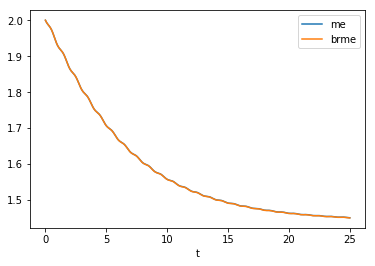

In [36]:
fig, ax = plt.subplots()

ax.plot(times, n_me, label='me')
ax.plot(times, n_brme, label='brme')
ax.legend()
ax.set_xlabel("t");

## Atom-Cavity

In [37]:
N = 10
a = tensor(destroy(N), identity(2))
sm = tensor(identity(N), destroy(2))
psi0 = ket2dm(tensor(basis(N, 1), basis(2, 0)))
e_ops = [a.dag() * a, sm.dag() * sm]

### Weak coupling

In [38]:
w0 = 1.0 * 2 * np.pi
g = 0.05 * 2 * np.pi
kappa = 0.05
times = np.linspace(0, 5 * 2 * np.pi / g, 1000)

a_ops = [[(a + a.dag()),lambda w : kappa*(w > 0)]]

In [39]:
c_ops = [np.sqrt(kappa) * a]
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (a + a.dag()) * (sm + sm.dag())

In [40]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

In [41]:
result_brme = brmesolve(H, psi0, times, a_ops, e_ops)

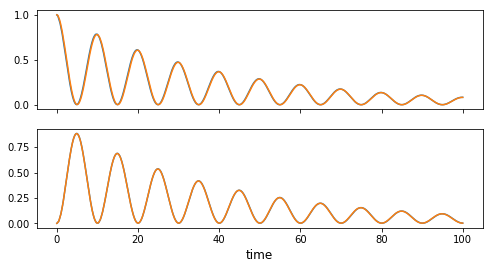

In [42]:
plot_expectation_values([result_me, result_brme]);

In the weak coupling regime there is no significant difference between the Lindblad master equation and the Bloch-Redfield master equation.

### Strong coupling

In [43]:
w0 = 1.0 * 2 * np.pi
g = 0.75 * 2 * np.pi
kappa = 0.05
times = np.linspace(0, 5 * 2 * np.pi / g, 1000)

In [44]:
c_ops = [np.sqrt(kappa) * a]
H = w0 * a.dag() * a + w0 * sm.dag() * sm + g * (a + a.dag()) * (sm + sm.dag())

In [45]:
result_me = mesolve(H, psi0, times, c_ops, e_ops)

In [48]:
result_brme = brmesolve(H, psi0, times, a_ops, e_ops)

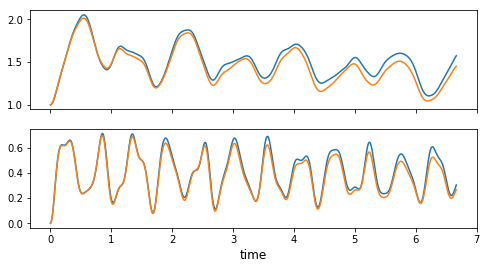

In [49]:
plot_expectation_values([result_me, result_brme]);

In the strong coupling regime there are some corrections to the Lindblad master equation that is due to the fact system eigenstates are hybridized states with both atomic and cavity contributions.

## Versions

In [50]:
from qutip.ipynbtools import version_table

version_table()

Software,Version
QuTiP,4.2.0
Numpy,1.13.1
SciPy,0.19.1
matplotlib,2.0.2
Cython,0.25.2
Number of CPUs,2
BLAS Info,INTEL MKL
IPython,6.1.0
Python,"3.6.1 |Anaconda custom (x86_64)| (default, May 11 2017, 13:04:09) [GCC 4.2.1 Compatible Apple LLVM 6.0 (clang-600.0.57)]"
OS,posix [darwin]
